In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 43.8 MB/s eta 0:00:00


In [ ]:

!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199774 sha256=07bf60c3823288669c1821f35523470e2ddf308a57edc4b12ea8297058cd7b97
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import re
import fasttext
import numpy as np
from konlpy.tag import Okt
from nltk.tokenize import word_tokenize
import nltk
import pathlib
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = "/content/drive/MyDrive/data/"

In [ ]:
train_df = pd.read_csv(data+'train_truncated.csv')
train_df = train_df.drop("source", axis=1)
train_df.head()

,ko,en
0,지방세법 개정안에 따른 종합부동산세는 부과징수권자의 경우를 제외하고는 대부분 종전 ...,Comprehensive real estate tax according to the...
1,실신 당시 5초 정도 의식소실이 있었고 바로 의식은 회복되으며 신경학적 이상증상은 ...,"At the time of fainting, there was a loss of c..."
2,문 대통령의 10월 방일이 성사될 경우 한·일 양국은 일본군 위안부 합의 이행 문제...,"If President Moon visits Japan in October, the..."
3,인덱스 펀드에 대한 투자에서는 장기적인 관점에서 수익을 얻을 수 있습니다.,Investment in index funds provides profitabili...
4,돌봐야 하는 비용도 있지.,I also have expenses to take care of.


In [ ]:
# Dataset size
dataset_size = len(train_df)
print(f"Dataset size: {dataset_size}")

Dataset size: 10000


# Preprocessing
*data description and cleaning*

In [ ]:
# Clean the korean text by removing special characters and numbers

def clean_korean_text(text):
    text = re.sub(r'[^가-힣\s]', '', text)
    return text

def tokenize_korean_text(text):
    okt = Okt()
    return okt.morphs(text)

def preprocess_korean_text(text):
    text = clean_korean_text(text)
    text = tokenize_korean_text(text)
    return text


In [ ]:
# Clean the english text by removing special characters and numbers
def clean_english_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

def tokenize_english_text(text):
    return word_tokenize(text)

def preprocess_english_text(text):
    text = clean_english_text(text)
    text = tokenize_english_text(text)
    return text

In [ ]:

#train_df['ko_detailed_tokenized'] = train_df['ko'].apply(preprocess_korean_text)
#train_df['en_detailed_tokenized'] = train_df['en'].apply(preprocess_english_text)

In [ ]:
# save the preprocessed data
#train_df.to_csv(data+'train_preprocessed.csv', index=False)
# Load the preprocessed data
train_df = pd.read_csv(data+'train_preprocessed.csv')

In [ ]:
train_df.head()

,ko,en,ko_detailed_tokenized,en_detailed_tokenized
0,지방세법 개정안에 따른 종합부동산세는 부과징수권자의 경우를 제외하고는 대부분 종전 ...,Comprehensive real estate tax according to the...,"['지방', '세법', '개정안', '에', '따른', '종합', '부동산', '세...","['comprehensive', 'real', 'estate', 'tax', 'ac..."
1,실신 당시 5초 정도 의식소실이 있었고 바로 의식은 회복되으며 신경학적 이상증상은 ...,"At the time of fainting, there was a loss of c...","['실신', '당시', '초', '정도', '의식', '소실', '이', '있었고'...","['at', 'the', 'time', 'of', 'fainting', 'there..."
2,문 대통령의 10월 방일이 성사될 경우 한·일 양국은 일본군 위안부 합의 이행 문제...,"If President Moon visits Japan in October, the...","['문', '대통령', '의', '월', '방일', '이', '성사', '될', '...","['if', 'president', 'moon', 'visits', 'japan',..."
3,인덱스 펀드에 대한 투자에서는 장기적인 관점에서 수익을 얻을 수 있습니다.,Investment in index funds provides profitabili...,"['인덱스', '펀드', '에', '대한', '투자', '에서는', '장기', '적...","['investment', 'in', 'index', 'funds', 'provid..."
4,돌봐야 하는 비용도 있지.,I also have expenses to take care of.,"['돌봐야', '하는', '비용', '도', '있지']","['i', 'also', 'have', 'expenses', 'to', 'take'..."


In [ ]:
train_df[['ko_detailed_tokenized', 'en_detailed_tokenized']].head()

,ko_detailed_tokenized,en_detailed_tokenized
0,"['지방', '세법', '개정안', '에', '따른', '종합', '부동산', '세...","['comprehensive', 'real', 'estate', 'tax', 'ac..."
1,"['실신', '당시', '초', '정도', '의식', '소실', '이', '있었고'...","['at', 'the', 'time', 'of', 'fainting', 'there..."
2,"['문', '대통령', '의', '월', '방일', '이', '성사', '될', '...","['if', 'president', 'moon', 'visits', 'japan',..."
3,"['인덱스', '펀드', '에', '대한', '투자', '에서는', '장기', '적...","['investment', 'in', 'index', 'funds', 'provid..."
4,"['돌봐야', '하는', '비용', '도', '있지']","['i', 'also', 'have', 'expenses', 'to', 'take'..."


In [ ]:
# Sentence length distribution
ko_lengths = train_df['ko_detailed_tokenized'].apply(len)
en_lengths = train_df['en_detailed_tokenized'].apply(len)

In [ ]:
import ast

import numpy as np



# Function to convert string representation of lists into actual lists

def string_to_list(string):

    return ast.literal_eval(string)



# Applying the function to the tokenized columns

train_df['ko_tokenized'] = train_df['ko_detailed_tokenized'].apply(string_to_list)

train_df['en_tokenized'] = train_df['en_detailed_tokenized'].apply(string_to_list)



# Calculating word counts and sentence lengths

train_df['ko_word_count'] = train_df['ko_tokenized'].apply(len)

train_df['en_word_count'] = train_df['en_tokenized'].apply(len)



# Calculating average sentence length for Korean and English

avg_sentence_length_ko = train_df['ko_word_count'].mean()

avg_sentence_length_en = train_df['en_word_count'].mean()



# Calculating word lengths and their variances

ko_word_lengths = train_df['ko_tokenized'].apply(lambda x: np.mean([len(word) for word in x]))

en_word_lengths = train_df['en_tokenized'].apply(lambda x: np.mean([len(word) for word in x]))



avg_word_length_ko = ko_word_lengths.mean()

avg_word_length_en = en_word_lengths.mean()



variance_word_length_ko = ko_word_lengths.var()

variance_word_length_en = en_word_lengths.var()



# Preparing results

results = {

    'Average Sentence Length (KO)': avg_sentence_length_ko,

    'Average Sentence Length (EN)': avg_sentence_length_en,

    'Average Word Length (KO)': avg_word_length_ko,

    'Average Word Length (EN)': avg_word_length_en,

    'Variance in Word Length (KO)': variance_word_length_ko,

    'Variance in Word Length (EN)': variance_word_length_en

}



results

{'Average Sentence Length (KO)': 23.4035,
 'Average Sentence Length (EN)': 23.2944,
 'Average Word Length (KO)': 1.8919709158640463,
 'Average Word Length (EN)': 4.876487830606661,
 'Variance in Word Length (KO)': 0.08048146077343807,
 'Variance in Word Length (EN)': 0.6779863653003176}

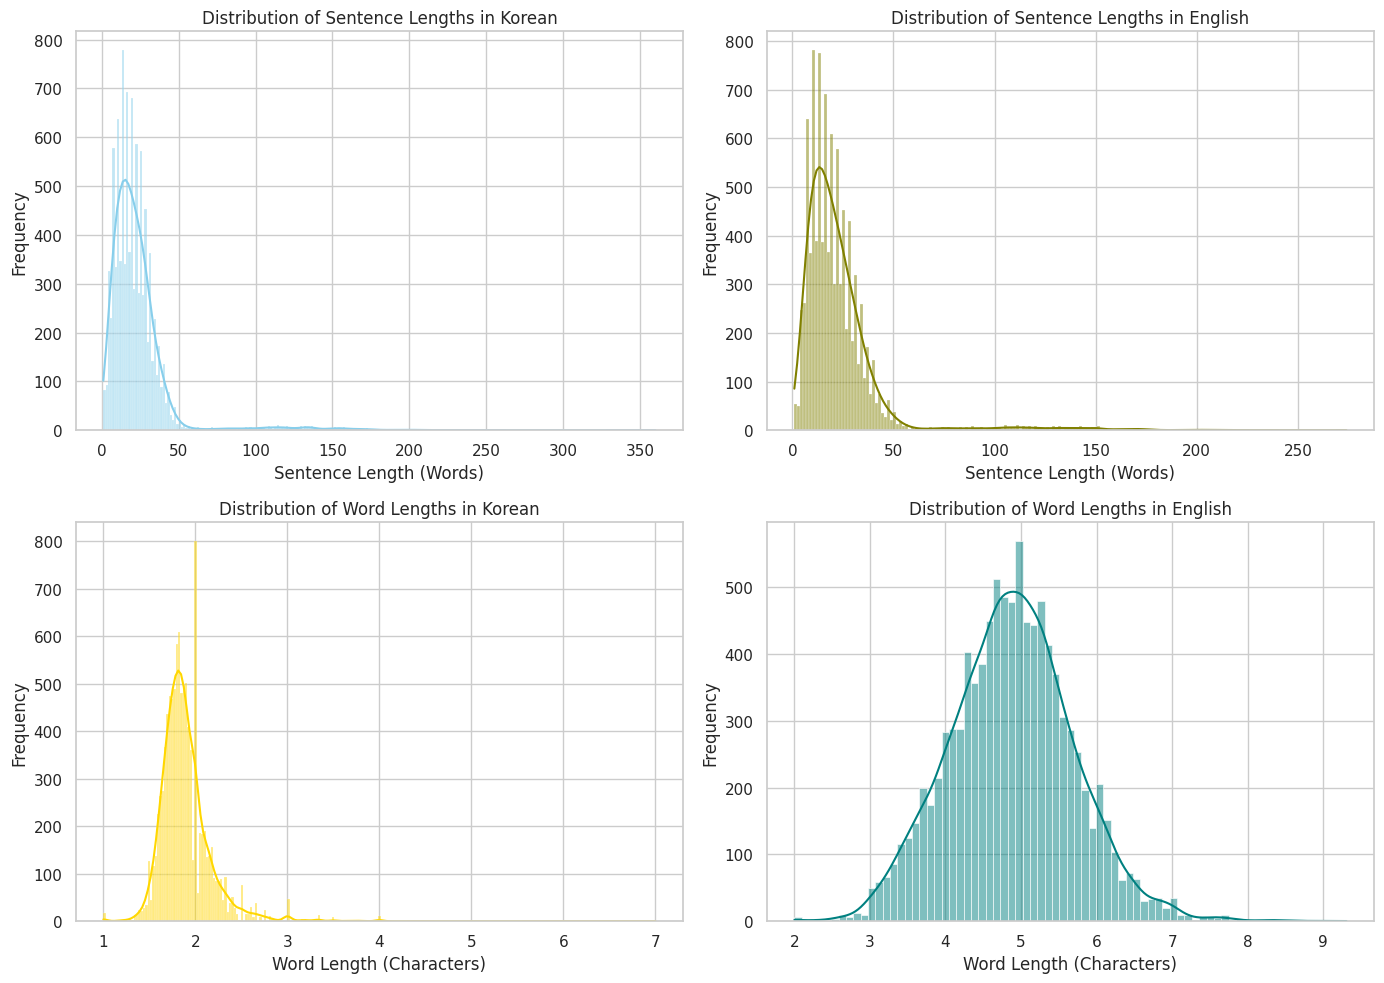

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting environment
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plotting distributions of sentence lengths
sns.histplot(train_df['ko_word_count'], ax=axes[0, 0], color="skyblue", kde=True)
axes[0, 0].set_title('Distribution of Sentence Lengths in Korean')
axes[0, 0].set_xlabel('Sentence Length (Words)')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(train_df['en_word_count'], ax=axes[0, 1], color="olive", kde=True)
axes[0, 1].set_title('Distribution of Sentence Lengths in English')
axes[0, 1].set_xlabel('Sentence Length (Words)')
axes[0, 1].set_ylabel('Frequency')

# Plotting distributions of word lengths
sns.histplot(ko_word_lengths, ax=axes[1, 0], color="gold", kde=True)
axes[1, 0].set_title('Distribution of Word Lengths in Korean')
axes[1, 0].set_xlabel('Word Length (Characters)')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(en_word_lengths, ax=axes[1, 1], color="teal", kde=True)
axes[1, 1].set_title('Distribution of Word Lengths in English')
axes[1, 1].set_xlabel('Word Length (Characters)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Calculating the number of unique words in both Korean and English texts

# Flattening the lists of tokenized words to count unique words
ko_unique_words = set(word for sentence in train_df['ko_tokenized'] for word in sentence)
en_unique_words = set(word for sentence in train_df['en_tokenized'] for word in sentence)

# Counting the unique words
num_unique_words_ko = len(ko_unique_words)
num_unique_words_en = len(en_unique_words)

print("Number of unique korean words: ", num_unique_words_ko)
print("Number of unique english words: ", num_unique_words_en)



Number of unique korean words:  22776
Number of unique english words:  18679


In [ ]:
from collections import Counter

# Counting the frequency of each word in both Korean and English texts
ko_word_frequency = Counter(word for sentence in train_df['ko_tokenized'] for word in sentence)
en_word_frequency = Counter(word for sentence in train_df['en_tokenized'] for word in sentence)

# Extracting the 10 most common words in Korean and English
most_common_words_ko = ko_word_frequency.most_common(10)
most_common_words_en = en_word_frequency.most_common(10)

def pretty_print_common_words(common_words, language):

    print(f"Most Common Words in {language}:")

    for word, freq in common_words:

        print(f"{word}: {freq} times")

    print("\n")  # Adding a newline for better readability



# Pretty print for Korean and English

pretty_print_common_words(most_common_words_ko, "Korean")

pretty_print_common_words(most_common_words_en, "English")


Most Common Words in Korean:
을: 7041 times
의: 6878 times
에: 5907 times
이: 5443 times
를: 4536 times
가: 3003 times
은: 2978 times
는: 2939 times
으로: 2384 times
한: 2177 times


Most Common Words in English:
the: 19099 times
of: 8366 times
a: 7287 times
and: 6692 times
to: 6282 times
in: 4913 times
is: 3938 times
for: 2381 times
that: 2333 times
it: 1839 times




In both languages, the most frequent words are primarily function words—those that have little lexical meaning on their own but are crucial for the grammar and structure of sentences. This includes prepositions (e.g., "에" in Korean, "in" in English), articles ("the" in English), conjunctions ("and" in English), and particles (e.g., "을", "는" in Korean).


Korean: The presence of particles like "을", "의", "에", "이", and "를" at the top of the list is notable. Korean is an agglutinative language, meaning it extensively uses affixes to indicate grammatical relationships within sentences. These particles serve various grammatical roles, such as marking the subject, object, possessive relationships, and more.
English: Articles ("the", "a") and prepositions ("of", "in", "to") are among the most common words, reflecting English's reliance on these words to define noun phrases and relationships between words. The repetition of "the" (including its capitalized form "The" at the beginning of sentences) underscores its fundamental role in English syntax.

When translating between Korean and English, understanding the function and frequency of these common words is essential. Translators must adeptly navigate the differences in sentence structure and grammatical markers, given that direct translations of function words are often not possible. For instance, Korean particles have no direct equivalent in English but are crucial for indicating grammatical relationships.

Note on korean :

Subject Particles

이/가: These particles mark the subject of a sentence. "이" is used after a consonant, and "가" is used after a vowel. They help to indicate what or who is performing the action.
Example: 사과가 맛있다 (The apple is delicious). "사과" means apple, and "가" indicates that the apple is the subject.

Object Particles

을/를: These particles mark the object of a sentence, which is the recipient of the action. "을" is used after a consonant, and "를" is used after a vowel.
Example: 사과를 먹었다 (I ate an apple). "사과" means apple, and "를" shows that the apple is the object of eating.

Topic Particles

은/는: These particles indicate the topic of a sentence, which can be thought of as the subject being discussed or contextualized. "은" is used after a consonant, and "는" is used after a vowel. They are often used for contrast or emphasis.
Example: 사과는 맛있다 (As for apples, they are delicious). Here, "사과" means apple, and "는" suggests that apples, in particular, are delicious, possibly implying a contrast with something else.

Possessive Particles

의: This particle indicates possession, similar to the English "'s" or "of."
Example: 철수의 책 (Cheolsu's book). "철수" means Cheolsu, and "의" indicates possession, so it's Cheolsu's book.

Directional Particles

에, 으로: "에" is used to indicate direction or location (to, at), and "으로" is used to indicate direction or means (towards, by way of).
Example: 학교에 가다 (Go to school), 집으로 가다 (Go towards home).





In [ ]:
def build_vocab(texts, special_tokens=['<PAD>', '<SOS>', '<EOS>', '<UNK>']):
    counter = Counter()
    for text in texts:
        counter.update(text)
    most_common = counter.most_common()
    vocab = {word: index + len(special_tokens) for index, (word, _) in enumerate(most_common)}
    # Add special tokens to vocab
    for index, token in enumerate(special_tokens):
        vocab[token] = index
    return vocab



In [ ]:
ko_vocab = build_vocab(train_df['ko_detailed_tokenized'])
en_vocab = build_vocab(train_df['en_detailed_tokenized'])

In [ ]:

ft_ko = fasttext.load_model(data+'cc.ko.300.bin')

ft_en = fasttext.load_model(data+'cc.en.300.bin')

In [ ]:
def create_embedding_matrix(vocab, fasttext_model):
    embedding_matrix = np.zeros((len(vocab), fasttext_model.get_dimension()))
    for word, i in vocab.items():
        embedding_vector = fasttext_model.get_word_vector(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

ko_embedding_matrix = create_embedding_matrix(ko_vocab, ft_ko)
en_embedding_matrix = create_embedding_matrix(en_vocab, ft_en)


In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

def text_to_sequence(tokenized_texts, vocab):
    sequences = []
    for text in tokenized_texts:
        sequence = [vocab.get(word, vocab['<UNK>']) for word in text]
        sequences.append(sequence)
    return sequences

ko_sequences = text_to_sequence(train_df['ko_detailed_tokenized'], ko_vocab)
en_sequences = text_to_sequence(train_df['en_detailed_tokenized'], en_vocab)

ko_padded = pad_sequences(ko_sequences, padding='post')
en_padded = pad_sequences(en_sequences, padding='post')

# Adding start and end tokens for the target sequences
en_padded = np.insert(en_padded, 0, en_vocab['<SOS>'], axis=1)
en_padded = np.append(en_padded, np.full((en_padded.shape[0], 1), en_vocab['<EOS>']), axis=1)

X_train, X_val, y_train, y_val = train_test_split(ko_padded, en_padded, test_size=0.2, random_state=42)


In [40]:
from keras.models import Model
from keras.layers import Input, LSTM, Embedding, Dense

def define_seq2seq_model(src_vocab_size, target_vocab_size, src_embedding_matrix, target_embedding_matrix, max_len_src, max_len_target, units=256):
    # Encoder
    encoder_inputs = Input(shape=(None,))
    enc_emb = Embedding(src_vocab_size, 300, weights=[src_embedding_matrix], trainable=False)(encoder_inputs)
    encoder_lstm = LSTM(units, return_state=True)
    encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
    encoder_states = [state_h, state_c]
    encoder_model = Model(encoder_inputs, encoder_states)

    # Decoder
    decoder_inputs = Input(shape=(None,))
    decoder_state_input_h = Input(shape=(units,))
    decoder_state_input_c = Input(shape=(units,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

    dec_emb_layer = Embedding(target_vocab_size, 300, weights=[target_embedding_matrix], trainable=False)
    dec_emb = dec_emb_layer(decoder_inputs)

    decoder_lstm = LSTM(units, return_sequences=True, return_state=True)
    decoder_outputs, state_h2, state_c2 = decoder_lstm(dec_emb, initial_state=decoder_states_inputs)
    decoder_states = [state_h2, state_c2]

    decoder_dense = Dense(target_vocab_size, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)

    decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

    # Seq2Seq Model
    decoder_outputs, _, _ = decoder_lstm(dec_emb_layer(decoder_inputs), initial_state=encoder_states)
    decoder_outputs = decoder_dense(decoder_outputs)
    seq2seq_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

    return seq2seq_model, encoder_model, decoder_model

model,encoder_model,decoder_model = define_seq2seq_model(len(ko_vocab), len(en_vocab), ko_embedding_matrix, en_embedding_matrix, ko_padded.shape[1], en_padded.shape[1])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_21 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 input_22 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 embedding_16 (Embedding)    (None, None, 300)            411900    ['input_21[0][0]']            
                                                                                                  
 embedding_17 (Embedding)    (None, None, 300)            10500     ['input_22[0][0]']            
                                                                                           

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
y_train_decoder_input = y_train[:, :-1]
y_train_decoder_output = y_train[:, 1:, np.newaxis]
y_val_decoder_input = y_val[:, :-1]
y_val_decoder_output = y_val[:, 1:, np.newaxis]


# Define model checkpoint
checkpoint_path = data+"model_weights_15.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Train the model
history = model.fit([X_train, y_train_decoder_input], y_train_decoder_output,
                    batch_size=64,
                    epochs=30,
                    validation_data=([X_val, y_val_decoder_input], y_val_decoder_output),
                    callbacks=[checkpoint])


Epoch 1/30
125/125 [==============================] - ETA: 0s - loss: 0.2857 - accuracy: 0.9329
Epoch 1: val_loss improved from inf to 0.19696, saving model to /content/drive/MyDrive/data/model_weights.h5
125/125 [==============================] - 37s 270ms/step - loss: 0.2857 - accuracy: 0.9329 - val_loss: 0.1970 - val_accuracy: 0.9521
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


125/125 [==============================] - ETA: 0s - loss: 0.1656 - accuracy: 0.9557
Epoch 2: val_loss improved from 0.19696 to 0.14947, saving model to /content/drive/MyDrive/data/model_weights.h5
125/125 [==============================] - 33s 267ms/step - loss: 0.1656 - accuracy: 0.9557 - val_loss: 0.1495 - val_accuracy: 0.9596
Epoch 3/30
125/125 [==============================] - ETA: 0s - loss: 0.1415 - accuracy: 0.9605
Epoch 3: val_loss improved from 0.14947 to 0.13773, saving model to /content/drive/MyDrive/data/model_weights.h5
125/125 [==============================] - 34s 273ms/step - loss: 0.1415 - accuracy: 0.9605 - val_loss: 0.1377 - val_accuracy: 0.9611
Epoch 4/30
125/125 [==============================] - ETA: 0s - loss: 0.1340 - accuracy: 0.9614
Epoch 4: val_loss improved from 0.13773 to 0.13280, saving model to /content/drive/MyDrive/data/model_weights.h5
125/125 [==============================] - 34s 272ms/step - loss: 0.1340 - accuracy: 0.9614 - val_loss: 0.1328 - val

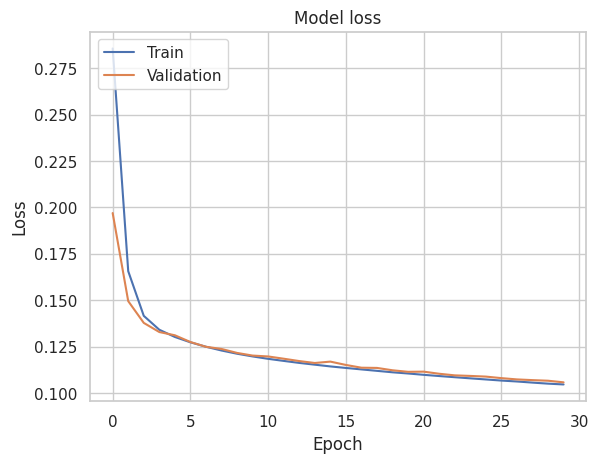

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [41]:
from keras.preprocessing.sequence import pad_sequences
from nltk.translate.bleu_score import corpus_bleu
max_len_target = en_padded.shape[1]
def translate_sequence(model, input_seq, target_vocab_inv):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1 with only the start character.
    en_seq = np.zeros((1, 1))
    en_seq[0, 0] = en_vocab['<SOS>']

    # Sampling loop for a batch of sequences
    stop_condition = False
    decoded_sentence = []
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([en_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = target_vocab_inv[sampled_token_index]
        decoded_sentence.append(sampled_char)

        # Exit condition: either hit max length or find stop character.
        if (sampled_char == '<EOS>' or len(decoded_sentence) > max_len_target):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence


In [ ]:
en_vocab_inv = {i: word for word, i in en_vocab.items()}
def evaluate_bleu_score(model, X_data, y_data, target_vocab_inv):
    actual, predicted = [], []
    for i, seq in enumerate(X_data):
        # Take one sequence for prediction
        input_seq = seq.reshape(1, -1)
        translation = translate_sequence(model, input_seq, target_vocab_inv)
        translation = [word for word in translation if word not in ['<SOS>', '<EOS>', '<UNK>']]

        # Original target sequence
        original_target_seq = [target_vocab_inv[idx] for idx in y_data[i] if idx in target_vocab_inv]
        original_target_seq = [word for word in original_target_seq if word not in ['<SOS>', '<EOS>', '<UNK>']]

        actual.append([original_target_seq])
        predicted.append(translation)

    print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
    print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0)))
    print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

evaluate_bleu_score(model, X_val, y_val, en_vocab_inv)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 20ms/step


In [ ]:
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()


In [ ]:
from sklearn.manifold import TSNE

# Select a subset of word embeddings for visualization (for better readability)
keys = list(en_vocab.keys())[:100]

embedding_clusters = np.array([en_embedding_matrix[en_vocab[key]] for key in keys])
embedding_clusters = TSNE(n_components=2).fit_transform(embedding_clusters)

plt.figure(figsize=(15, 15))
for i, word in enumerate(keys):
    plt.scatter(embedding_clusters[i, 0], embedding_clusters[i, 1])
    plt.annotate(word, xy=(embedding_clusters[i, 0], embedding_clusters[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()
